# Lab assignment: building ensembles

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/ensemble.jpg"/>

 <div align="right">
  Photo credit: <a href=https://www.flickr.com/photos/buffo400/44243474840>Heinz Bunse - The french ensemble nevermind on stage of the Strawinsky Saal Donaueschingen</a>
</div> 

In this assignment we will start from some base classifiers and build ensembles of them to improve performance. Finally, we will compare these ensembles with tree-specific versions, so as to see which model performs best on a battery of classification datasets.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
This is an advanced exercise that can help you gain a deeper knowledge into the topic. Good luck!</font>

***

To avoid missing packages and compatibility issues you should run this notebook under one of the [recommended Ensembles environment files](https://github.com/albarji/teaching-environments-ensembles).

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Shift+Tab to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Initialization

Let's start with some code to configure matplotlib and fix the random seed

In [48]:
import numpy as np

np.random.seed(42)
%matplotlib inline

## Data loading

In this assignment we will work with 13 datasets located under the *data* folder. Let's take a look at them

In [49]:
from os import listdir

dataset_files = listdir('./data/')
dataset_files

['banana.test',
 'banana.train',
 'breastcancer.test',
 'breastcancer.train',
 'diabetes.test',
 'diabetes.train',
 'flare-solar.test',
 'flare-solar.train',
 'german.test',
 'german.train',
 'heart.test',
 'heart.train',
 'image.test',
 'image.train',
 'ringnorm.test',
 'ringnorm.train',
 'splice.test',
 'splice.train',
 'thyroid.test',
 'thyroid.train',
 'titanic.test',
 'titanic.train',
 'twonorm.test',
 'twonorm.train',
 'waveform.test',
 'waveform.train']

Each of the 13 datasets is represented as two files: one for the training data (`.train`) and another one for the test data (`.test`).

To begin, we will prepare some code to load the datasets. All of them follow the same format, so it makes sense to define some functions for this task. But let's start with the minimum block: how to load a single file?

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
Use a text editor to look at the contents of any of the files. These files follow a fixed width format, which means all data columns are aligned and separated by whitespaces. Fortunately, numpy includes the <a href=https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html>loadtxt</a> function that allows loading these kind of files.
    
Also, there are no headers! This is because the interpretation is easy: that last column is the output class, while the rest of columns are input features.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Create a funcion <b>load_datafile</b> that receives the full path to a datafile and returns <b>X</b> and <b>y</b> numpy arrays with the input features and classes contained in that file. Make sure that the returned <b>y</b> is a numpy array of a single dimension.
</font>

***

In [50]:
####### INSERT YOUR CODE HERE
import numpy as np

def load_datafile(fname):
    data = np.loadtxt(fname)
    return data[:,:-1], data[:, -1]

If implemented correctly, the following call should properly load the features and targets of the **banana** training dataset.

In [51]:
X_train_banana, y_train_banana = load_datafile("./data/banana.train")

In [52]:
X_train_banana

array([[ 6.5890573e-01, -9.8507109e-01],
       [ 1.9586164e-01,  1.2701513e+00],
       [-1.4165922e+00, -3.2687852e-01],
       [ 1.8235896e+00,  1.4304720e+00],
       [-4.8725551e-01, -5.3564691e-01],
       [ 2.3457599e-01,  1.4837959e+00],
       [ 1.3787269e+00,  1.3129571e-01],
       [-1.4448928e+00, -7.4627109e-02],
       [-1.6301150e-01, -3.9782330e-01],
       [ 1.2529298e+00, -3.2199231e-01],
       [ 1.3317168e+00, -8.0225614e-02],
       [-1.7978052e-01,  5.9472930e-01],
       [-1.2856632e+00, -7.5447340e-01],
       [ 4.0856326e-01,  1.4455372e+00],
       [-1.4528146e+00, -1.2507707e+00],
       [-1.3152231e+00,  9.9478455e-01],
       [ 1.0226580e+00, -7.2841840e-01],
       [ 1.7177764e+00,  2.9111197e-02],
       [-1.7819504e+00, -6.8676174e-01],
       [-9.6602030e-01, -6.2760280e-01],
       [-1.5745622e+00,  3.7779938e-01],
       [ 1.1159566e+00, -6.5925063e-01],
       [ 2.3488319e-02, -1.7987047e-01],
       [-1.1747689e+00,  1.5636960e-01],
       [-1.05013

In [53]:
y_train_banana

array([ 1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,
       -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,
       -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
        1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
        1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,
        1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,  1

Moving one step further, let's now create a function that loads the two datasets available for the same problem (`.train` and `.test`) and organizes them in a dictionary in the form

    {
        "train": (X_train, y_train),
        "test": (X_test, y_test)
    }
    
That is, the dictionary must have a key `train` containing a tuple or list with the matrix of input features `X` and the targets `y` for the training data. Similarly, a `test` key must also be present, containing features and targets for the test data.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Create a funcion <b>load_dataset</b> that receives the path to a dataset (without the <i>.train</i> or <i>.test</i> extension) and returns a dictionary with the training and test data, in the format presented above.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    Make use of the <b>load_datafile</b> function you created above!
</font>

***

In [54]:
####### INSERT YOUR CODE HERE
def load_dataset(fname):
    return {
        "train":  load_datafile(f"{fname}.train"),
        "test":  load_datafile(f"{fname}.test"),
    }

Let's try your function by loading all the data for the banana problem

In [55]:
data_banana = load_dataset("./data/banana")
data_banana

{'train': (array([[ 6.5890573e-01, -9.8507109e-01],
         [ 1.9586164e-01,  1.2701513e+00],
         [-1.4165922e+00, -3.2687852e-01],
         [ 1.8235896e+00,  1.4304720e+00],
         [-4.8725551e-01, -5.3564691e-01],
         [ 2.3457599e-01,  1.4837959e+00],
         [ 1.3787269e+00,  1.3129571e-01],
         [-1.4448928e+00, -7.4627109e-02],
         [-1.6301150e-01, -3.9782330e-01],
         [ 1.2529298e+00, -3.2199231e-01],
         [ 1.3317168e+00, -8.0225614e-02],
         [-1.7978052e-01,  5.9472930e-01],
         [-1.2856632e+00, -7.5447340e-01],
         [ 4.0856326e-01,  1.4455372e+00],
         [-1.4528146e+00, -1.2507707e+00],
         [-1.3152231e+00,  9.9478455e-01],
         [ 1.0226580e+00, -7.2841840e-01],
         [ 1.7177764e+00,  2.9111197e-02],
         [-1.7819504e+00, -6.8676174e-01],
         [-9.6602030e-01, -6.2760280e-01],
         [-1.5745622e+00,  3.7779938e-01],
         [ 1.1159566e+00, -6.5925063e-01],
         [ 2.3488319e-02, -1.7987047e-01],
  

Now for the final loading step!

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Create a funcion <b>load_datasets</b> that receives no arguments and returns a dictionary indexed by the dataset names, containing all the data from those datasets. That is, it must return a dictionary in the form
    
<pre>
datasets = {
  "titanic" : {
    "train" : (X_train_titanic, y_train_titanic),
    "test" : (X_test_titanic, y_test_titanic)
  },
  "thyroid" : {
    "train" : (X_train_thyroid, y_train_thyroid),
    "test" : (X_test_thyroid, y_test_thyroid)
  },
  ...
}
</pre>
    
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    To obtain the names of all the files containing data, you can use the <b>listdir</b> function presented at the beginning of this notebook. You can also make use of the <a href=https://www.w3schools.com/python/ref_string_split.asp>split</a> function to extract just the filename from a full file path.<br>
    Also, make use of the <b>load_dataset</b> function you created above!
</font>

***

In [56]:
####### INSERT YOUR CODE HERE
def load_datasets():
    dataset_files = listdir('./data/')
    dataset_names = {file.split(".")[-2] for file in dataset_files}
    return {name: load_dataset(f"./data/{name}") for name in dataset_names}

Let's try your function works!

In [57]:
datasets = load_datasets()
datasets

{'breastcancer': {'train': (array([[-0.69885702,  0.90363699,  0.59598884, ...,  0.97475967,
           -0.98230246,  0.51629307],
          [-1.6961842 ,  0.90363699,  1.5238351 , ...,  0.97475967,
            0.62937942,  0.51629307],
          [-0.69885702,  0.90363699, -0.33185742, ...,  0.97475967,
           -0.17646152,  0.51629307],
          ...,
          [-0.69885702,  0.90363699,  2.4516814 , ..., -1.0184056 ,
           -0.17646152,  0.51629307],
          [ 0.29847018, -0.8905408 ,  0.59598884, ..., -1.0184056 ,
            1.4352204 , -1.9227466 ],
          [-0.69885702,  0.90363699,  0.59598884, ...,  0.97475967,
           -0.98230246,  0.51629307]]),
   array([ 1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
          -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
          -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
           1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
           1., -1., -1

### Saving the data file

Since we will use these datasets in more notebooks after this, we will save the organized object we have created as a `pickle` file. These files can hold complex python structures, and are more efficient in terms of disk space than text files. We can create a pickle file for our data as follows

In [58]:
import pickle as pkl

with open('datasets.pkl', 'wb') as file:
    pkl.dump(datasets, file)

With this, in further notebooks we will be able to load back the exactly same data, in the exactly same structure, by copying the file to the notebook folder and using the following code

```
import pickle as pkl

with open('datasets.pkl', 'rb') as file:
    datasets = pkl.load(file)
```

## Base learners

In order to build an ensemble, we need to decide which are the individual learners that we want to combine. Remember that ideally we would like two things (most often contradictory) in those learners:
* <i>Accuracy</i>: the more accurate they are, the more accurate their combination is expected to be.
* <i>Diversity</i>: the more diverse they are, the more likely it is that their combination surpasses them.

As a compromise between these two goals and because of some restrictions scikit-learn imposes, we will use the following base classifiers:
* <a href="https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression">Logistic Regression</a>
* <a href="https://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd">Stochastic Gradient Descent</a>
* <a href="https://scikit-learn.org/stable/modules/naive_bayes.html">(Gaussian) Naïve Bayes</a>
* <a href="https://scikit-learn.org/stable/modules/tree.html">Decision tree</a>

Which are comprised in the following list, together with their names in short:

In [59]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

base_learners = [
    ('lr', LogisticRegression()), 
    ('sgd', SGDClassifier()), 
    ('nb', GaussianNB()), 
    ('dt', DecisionTreeClassifier())
]

Time to fit them on the training data to have their reference accuracies.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
 Fit the four models above on all training sets and collect the accuracies on the test sets in a dataframe called <b><i>base_scores</b></i> (one row per dataset, one column per model). Use as column names the names of the base learners themselves.
    
</font>

***

In [60]:
####### INSERT YOUR CODE HERE
import pandas as pd

base_scores = pd.DataFrame.from_dict(
    data = {
        ds: {
            mod_name: mod_obj.fit(*datasets[ds]['train']).score(*datasets[ds]['test']) 
            for mod_name, mod_obj in base_learners
        }
        for ds in datasets.keys()
    },
    orient='index'
).rename_axis(index='dataset')
base_scores

,lr,sgd,nb,dt
dataset,,,,
breastcancer,0.740260,0.688312,0.727273,0.649351
image,0.820792,0.776238,0.598020,0.969307
german,0.786667,0.720000,0.746667,0.716667
heart,0.800000,0.810000,0.790000,0.790000
twonorm,0.971857,0.950143,0.976714,0.790429
thyroid,0.880000,0.920000,0.920000,0.973333
diabetes,0.763333,0.693333,0.750000,0.713333
splice,0.853333,0.842299,0.880920,0.896092
flare-solar,0.657500,0.622500,0.605000,0.650000


<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Plot the accuracies you obtained. Which is the winner model for each dataset? Do you think these models are accurate and diverse?
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    You can easily plot the contents of a pandas DataFrame using the <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html>plot</a> method of the DataFrame itself. Configure the <b>kind</b> parameter to choose an adequate kind of plot. Check also the rest of parameters to control the plot style.
</font>

***

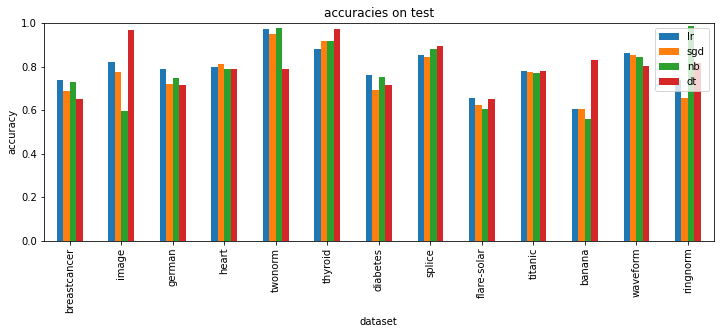

In [61]:
####### INSERT YOUR CODE HERE
ax = base_scores.plot(kind='bar', title='accuracies on test', ylim=(0.0, 1.0), figsize=(12, 4)).set_ylabel('accuracy');

## Bagging and boosting

Perhaps the easiest way to form an ensemble is with the <b><a href="https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator">bagging</a></b> technique. Scikit-learn allows us to build bags of whichever base estimator we want. Let us see if we can do better than with individual estimators:

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Build bags of the four base models and fit them on all training sets, collecting the resulting accuracies on test as you did before, this time on a dataframe called <b><i>bagging_scores</i></b>. Use as column names the names of the base learners plus the suffix <b><i>'_bag'</i></b>, so as to make the difference clear.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
Check carefully the documentation of the <b><a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html">BaggingClassifier</a></b> class. Pay particular attention to the parameters <b><i>base_estimator</i></b> (use each base model!), <b><i>n_estimators</i></b> (use the <b>ESTIM</b> variable provided below) and <b><i>n_jobs</i></b> (take advantage of parallelism!).
</font>

***

In [62]:
from sklearn.ensemble import BaggingClassifier
ESTIMS = 50

In [63]:
####### INSERT YOUR CODE HERE
bagging_scores = pd.DataFrame.from_dict(
    data={
        ds: {
            mod_name + '_bag': (
                BaggingClassifier(
                    base_estimator=mod_obj, 
                    n_estimators=ESTIMS, 
                    n_jobs=-1
                ).fit(*datasets[ds]['train']).score(*datasets[ds]['test'])
            )
            for mod_name, mod_obj in base_learners
        }
        for ds in datasets.keys()
    },
    orient='index'
)
bagging_scores

,lr_bag,sgd_bag,nb_bag,dt_bag
breastcancer,0.753247,0.727273,0.727273,0.701299
image,0.822772,0.840594,0.598020,0.978218
german,0.796667,0.796667,0.740000,0.780000
heart,0.810000,0.800000,0.790000,0.800000
twonorm,0.972286,0.968000,0.976143,0.934143
thyroid,0.866667,0.920000,0.933333,0.973333
diabetes,0.760000,0.770000,0.743333,0.763333
splice,0.853333,0.851034,0.881379,0.948046
flare-solar,0.657500,0.662500,0.607500,0.645000
titanic,0.781570,0.770843,0.770843,0.781570


Let's see if we have actually improved:

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Concatenate <i>base_scores</i> and <i>bagging_scores</i> in another dataframe <b><i>all_scores</i></b> and plot the accuracies obtained. Which is the winner model for each dataset now? Did bagging help? Why/why not?
</font>

***

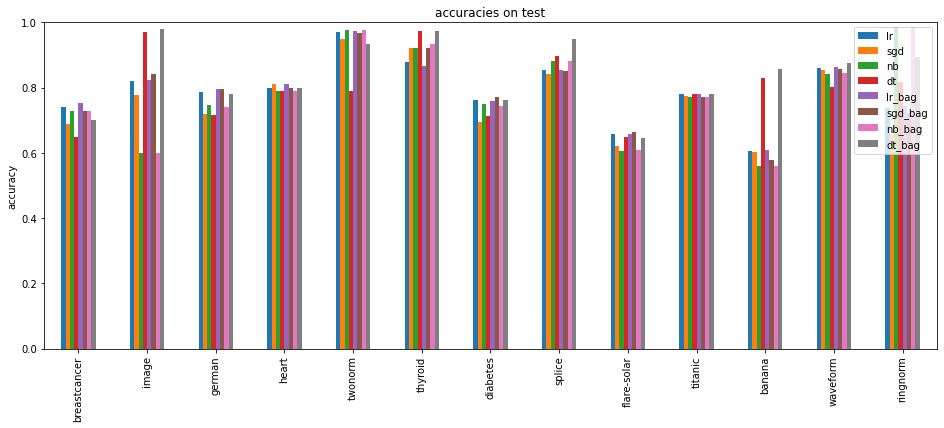

In [64]:
####### INSERT YOUR CODE HERE
all_scores = pd.concat([base_scores, bagging_scores], axis=1)
ax = all_scores.plot(kind='bar', title='accuracies on test', ylim=(0.0, 1.0), figsize=(16, 6)).set_ylabel('accuracy');

Another popular option to build ensembles is via <b><a href="https://scikit-learn.org/stable/modules/ensemble.html#adaboost">boosting</a></b>. Scikit-learn is more restrictive in the kind of models amenable to be boosted, but in this case all the models we selected are valid:

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
 Build boosted ensembles of the four base models and fit them on all training sets, collecting the resulting accuracies on test as you did before, this time on a dataframe called <b><i>boosting_scores</i></b>. Use as column names the names of the base learners plus the suffix <b><i>'_boo'</i></b>, so as to make the difference clear.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
As for bagging, check carefully the documentation of the <b><a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html">AdaBoostClassifier</a></b> class. You already know what <b><i>base_estimator</i></b> and <b><i>n_estimators</i></b> are for, but now you need to specify also <b><i>algorithm='SAMME'</i></b> (the default 'SAMME.R' will crash!). Can you explain why is there no <b><i>n_jobs</i></b> in this case?
</font>

***

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
####### INSERT YOUR CODE HERE
boosting_scores = pd.DataFrame.from_dict(
    data={
        ds: {
            mod_name + '_boo': (
                AdaBoostClassifier(
                    base_estimator=mod_obj, 
                    n_estimators=ESTIMS, 
                    algorithm='SAMME'  # SAMME.R requires predict_proba
                ).fit(*datasets[ds]['train']).score(*datasets[ds]['test'])
            )
            for mod_name, mod_obj in base_learners
        }
        for ds in datasets.keys()
    },
    orient='index'
)
boosting_scores

,lr_boo,sgd_boo,nb_boo,dt_boo
breastcancer,0.740260,0.688312,0.753247,0.649351
image,0.764356,0.824752,0.598020,0.968317
german,0.753333,0.786667,0.776667,0.733333
heart,0.750000,0.800000,0.780000,0.760000
twonorm,0.963143,0.965571,0.955571,0.782571
thyroid,0.840000,0.893333,0.933333,0.946667
diabetes,0.720000,0.763333,0.750000,0.716667
splice,0.836322,0.848736,0.868966,0.897931
flare-solar,0.657500,0.657500,0.605000,0.642500
titanic,0.741102,0.774256,0.770843,0.783033


Time to check which option is best.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
 Append <i>boosting_scores</i> to <i>all_scores</i> and plot now the accuracies obtained for both bagging and boosting. Which is the winner model for each dataset now? Did boosting help? Why/why not?
</font>

***

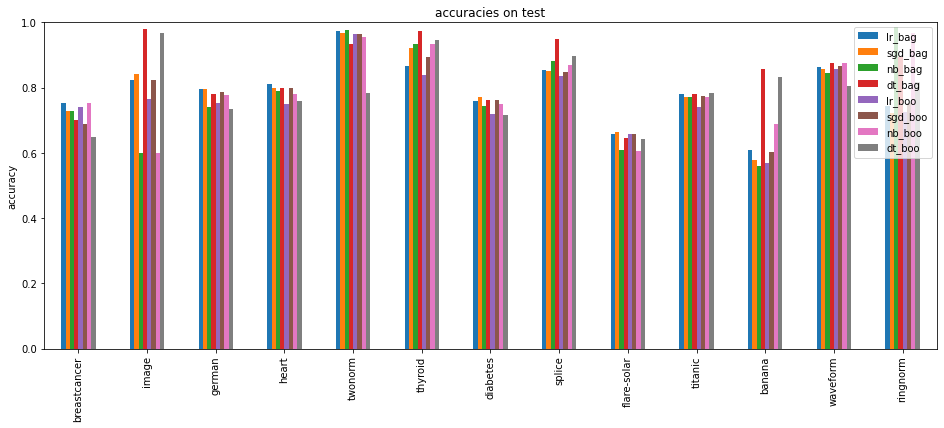

In [67]:
####### INSERT YOUR CODE HERE
all_scores = pd.concat([all_scores, boosting_scores], axis=1)
ax = pd.concat([bagging_scores, boosting_scores], axis=1).plot(kind='bar', title='accuracies on test', 
                                                               ylim=(0.0, 1.0), figsize=(16, 6)).set_ylabel('accuracy');

## Voting and stacking

One limitation of bagging and boosting is that they can only combine <b><i>homogeneous</i></b> models. For example, we cannot combine a Logistic Regression with a Decision Tree in the same bagging/boosting ensemble. This can become problematic unless the models being combined are unstable (i.e., sensitive to slight changes in the data). 

Think about this: if the mixture is homogeneous, and the models being mixed are also stable, the combination will be nearly identical to the model! So why caring about building a combination? We will be better off with the stable, individual model itself (that is, the way we started in this notebook).

Fortunately, there are ways out of this. The first one is resorting to other ensemble strategies that combine <b><i>heterogeneous models</b></i>. Scikit-learn has the following ones:
* <b><a href="https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier">Voting</a></b>: let each model output its estimated label for some pattern, and combine what models say on average/majority (usually with equal weight each).
* <b><a href="https://scikit-learn.org/stable/modules/ensemble.html#stacked-generalization">Stacking</a></b>: let each model output its estimated label for some pattern, and build another model on top of this which takes those estimated labels and decides how to combine them best to approximate the actual labels. 

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Build voting and stacking ensembles of the 4 base models and fit them on all training sets, collecting the resulting accuracies on test as you did before, this time on a dataframe called <b><i>mixing_scores</i></b>. This dataframe will only have 2 columns (why?); call them <b><i>'vote'</b></i> and <b><i>'stack'</b></i>, respectively.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
Inspect the documentation of <b><a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html">VotingClassifier</a></b> and <b><a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html">StackingClassifier</a></b> classes to use them properly.
</font>

***

In [68]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [69]:
####### INSERT YOUR CODE HERE
mixing_scores = pd.DataFrame.from_dict(
    data={
        ds: {
            'vote': (
                VotingClassifier(
                    estimators=base_learners, 
                    n_jobs=-1
                ).fit(*datasets[ds]['train']).score(*datasets[ds]['test'])
            ),
            'stack': (
                StackingClassifier(
                    estimators=base_learners, 
                    n_jobs=-1
                ).fit(*datasets[ds]['train']).score(*datasets[ds]['test'])
            )
        }
        for ds in datasets.keys()
    },
    orient='index'
)
mixing_scores

,vote,stack
breastcancer,0.740260,0.740260
image,0.814851,0.966337
german,0.780000,0.790000
heart,0.800000,0.800000
twonorm,0.967429,0.974714
thyroid,0.906667,0.933333
diabetes,0.736667,0.753333
splice,0.878621,0.924138
flare-solar,0.660000,0.657500
titanic,0.781570,0.770843


<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
     Append <i>mixing_scores</i> to <i>all_scores</i>. Since we have quite a lot of scores and it is difficult to compare them all, obtain the following:
     <ol>
         <li>Winner model for each dataset (i.e., the one with highest accuracy for each row)</li>
         <li>Model ranking across all datasets (i.e., sorted by decreasing average accuracy, taken over all datasets)</li>
     </ol>
     
Print the winner models and plot the ranking you get. What do you conclude?
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
Pandas can compute statistics across rows or columns of a Dataframe. For instance, check the <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html>mean</a>.<br>
    Also, for sorting the scores you can use the pandas <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html>sort_values</a> method.
</font>

***

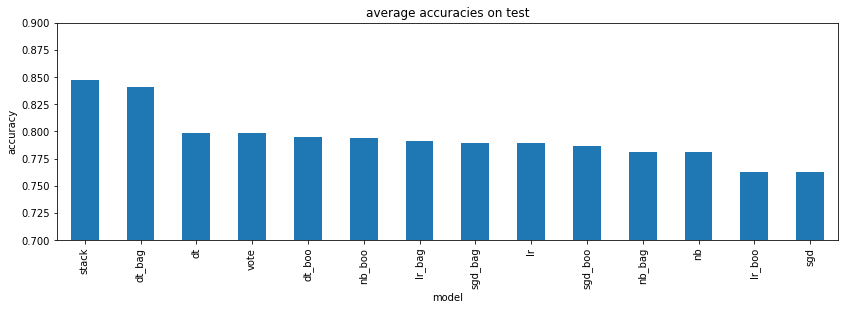

In [70]:
####### INSERT YOUR CODE HERE
all_scores = pd.concat([all_scores, mixing_scores], axis=1)
ranking = all_scores.mean(axis=0).sort_values(ascending=False)
ax = ranking.plot(kind='bar', title='average accuracies on test', ylim=(0.7, 0.9), figsize=(14, 4))
ax.set_ylabel('accuracy')
ax.set_xlabel('model');